In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd


In [3]:
df = pd.read_csv('dados\prouni_2005_2019.csv')
df.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,idade
0,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Enfermagem,Integral,***264740**,F,Branca,1987-02-17,nao,SUL,RS,santo angelo,34.0
1,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***976940**,F,Parda,1986-06-14,nao,SUL,RS,frederico westphalen,35.0
2,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***045340**,F,Parda,1984-06-03,nao,SUL,RS,frederico westphalen,37.0
3,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***988420**,M,Branca,1987-10-19,nao,SUL,RS,frederico westphalen,33.0
4,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***378080**,M,Amarela,1987-07-20,nao,SUL,RS,frederico westphalen,34.0


In [69]:
shp_ibge = gpd.read_file('utils\BR_Setores_2021\BR_Setores_2021.shp')
gpkg_ibge = 'utils\BR_Setores_2021\BR_Setores_2021.gpkg'
shp_ibge.to_file(gpkg_ibge, driver='GPKG')

In [7]:
brasil = gpd.read_file('utils\BR_Setores_2021\gpkg\BR_Setores_2021.gpkg')
brasil.head()

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
0,110001505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99890 -11.93178, -61.99887 -11.9..."
1,110001505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99996 -11.94202, -62.00570 -11.9..."
2,110001505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00377 -11.92940, -62.00375 -11.9..."
3,110001505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99902 -11.92686, -61.99901 -11.9..."
4,110001505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00653 -11.91785, -62.00645 -11.9..."


In [52]:
relacao_estado = df.groupby('SIGLA_UF_BENEFICIARIO_BOLSA', as_index= False).agg(count = ('SIGLA_UF_BENEFICIARIO_BOLSA', 'count'))
relacao_estado.sort_values(by='count', inplace = True)
relacao_estado.head()

,SIGLA_UF_BENEFICIARIO_BOLSA,count
21,RR,5553
3,AP,9561
0,AC,11292
26,TO,14416
1,AL,15417


In [11]:
df_new = brasil.merge(relacao_estado, left_on='SIGLA_UF', right_on='SIGLA_UF_BENEFICIARIO_BOLSA')

print(f'type: {type(df_new)}')
df_new.head()

type: <class 'geopandas.geodataframe.GeoDataFrame'>


,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry,SIGLA_UF_BENEFICIARIO_BOLSA,count
0,110001505000001,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99890 -11.93178, -61.99887 -11.9...",RO,31138
1,110001505000002,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99996 -11.94202, -62.00570 -11.9...",RO,31138
2,110001505000003,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00377 -11.92940, -62.00375 -11.9...",RO,31138
3,110001505000004,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-61.99902 -11.92686, -61.99901 -11.9...",RO,31138
4,110001505000005,1,Área Urbana de Alta Densidade de Edificações,11,Rondônia,RO,1100015,Alta Floresta D'Oeste,110001505,Alta Floresta D'Oeste,11000150500,NaN,"POLYGON ((-62.00653 -11.91785, -62.00645 -11.9...",RO,31138


In [4]:
colors = ['#FFFF99', '#009900', '#003366']
cmap = LinearSegmentedColormap.from_list("Custom", colors, N=20)

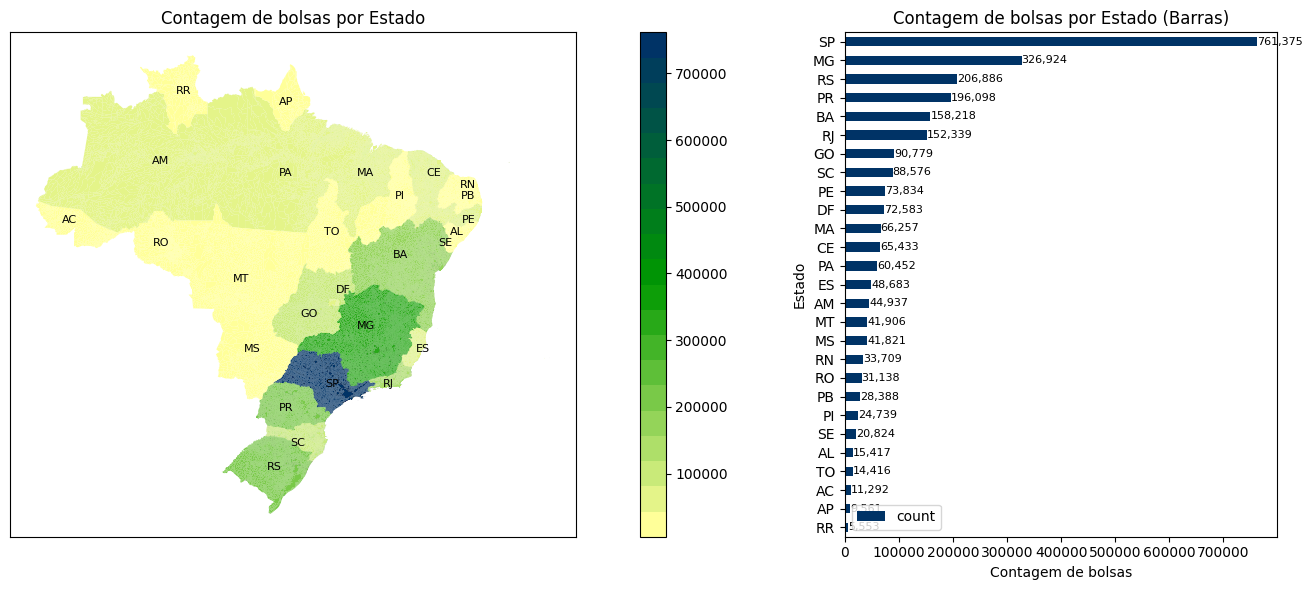

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [3, 1]})

ax1 = df_new.plot(column='count',  cmap=cmap, legend=True, ax=axes[0])
ax1.set_title('Contagem de bolsas por Estado')
state_coordinates = {'AC': (-71, -9),'AL': (-37, -10),'AP': (-52, 1),'AM': (-63, -4),'BA': (-42, -12),'CE': (-39, -5),'DF': (-47, -15),'ES': (-40, -20),'GO': (-50, -17),'MA': (-45, -5),'MT': (-56, -14),'MS': (-55, -20),'MG': (-45, -18),'PA': (-52, -5),'PB': (-36, -7),'PR': (-52, -25),'PE': (-36, -9),'PI': (-42, -7),'RJ': (-43, -23),'RN': (-36, -6),'RS': (-53, -30),'RO': (-63, -11),'RR': (-61, 2),'SC': (-51, -28),'SP': (-48, -23),'SE': (-38, -11),'TO': (-48, -10)}

for state, (x, y) in state_coordinates.items():
    ax1.annotate(state, xy=(x, y), xytext=(0, 0), textcoords="offset points",
                 ha='center', fontsize=8, color='black')
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = relacao_estado.plot.barh(x='SIGLA_UF_BENEFICIARIO_BOLSA', y='count', ax=axes[1], color = '#003366')
ax2.set_xlabel('Contagem de bolsas')
ax2.set_ylabel('Estado')
ax2.set_title('Contagem de bolsas por Estado (Barras)')

# Adicionar os valores acima das barras
for idx, value in enumerate(relacao_estado['count']):
    ax2.text(value, idx, f'{value:,}', va='center', fontsize=8)


plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()